# Health data preprocessing and input modelling exercises.

**In this lab you will:**

* Gain practical knowledge in pre-processing and analysing real world stochastic health system data
* Learn how to fit distribution to data
* Learn how to select a suitable distribution for your data

> **STUDENT BEWARE**: This lab can be very frustrating! It is designed to show you the sort of data wrangling, analysis and modelling decisions/assumptions you may need to perform in real simulation study.  But do persevere with it (answers are available as well!).  The experience should demonstrate that fitting distributions to real data is difficult and not quite as textbooks make out! By the end of the lab both your `pandas` skills and simulation input modelling skills will have improved.  >_<


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#auto_fit function from pythonhealthcare.org
from input_modelling.fitting import auto_fit

sns.set()

## **Exercise 1**: stroke ward admissions and early supported discharge

The dataset we will work with represents admissions and discharges at a hospital acute stroke ward.  

The dataset contains the following fields

* **patient_type**: stroke, tia (minor stroke), complex-neurological (e.g. brain injury) and other (i.e. non-neurological patients) (str)
* **hosp_arrival_date**: date dd-mmm-yy of arrival to hospital (str)
* **hosp_arrival_time**: time HH:MM of arrival (str)
* **asu_admit_date**: date dd-mmm-yy of admission to the acute stroke unit (str)
* **asu_discharge_date**: date dd-mmm-yy of discharge from the acute stroke unit (str)
* **wardN_admit_date**: date dd-mmm-yy of admission to the ward N where N is between 2 and 4 (str)
* **wardN_discharge_date**: date dd-mmm-yy of discharge from the ward N where N is between 2 and 4 (str)
* **hosp_discharge_date**: date dd-mmm-yy of discharge from hospital (str)
* **hosp_discharge_time**: time HH:MM of discharge from hospital (str)
* **esd**: Early supported discharge binary 0/1. 1 == patient underwent ESD

**In this exercise you will need to:**
* Make some assumptions about how to model LoS.
* Preprocess and wrangle the data set
* Perform some exploratory analysis
* Fit one or more distributions to decide how to model the arrival process
* Fit one or more distributions to decide how to model length stay on the ward.

### Reading in the data

In [2]:
acute_strokes = pd.read_csv('../../../../input_modelling_data/input_data_asu.csv')

In [3]:
acute_strokes.shape

(2293, 14)

In [4]:
#take a look at the head of the dataset
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd
0,Other,20-Jul-12,21:00,21-Jul-12,26-Jul-12,NaN,NaN,NaN,NaN,NaN,NaN,26-Jul-12,17:15,0
1,Complex-neurological,17-Mar-13,21:20,19-Mar-13,20-Mar-13,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-13,10:58,0
2,Complex-neurological,19-Apr-11,15:45,19-Apr-11,21-Apr-11,NaN,NaN,NaN,NaN,NaN,NaN,21-Apr-11,18:08,0
3,Complex-neurological,13-Feb-13,18:35,14-Feb-13,14-Feb-13,NaN,NaN,NaN,NaN,NaN,NaN,14-Feb-13,15:44,0
4,Stroke,10-Jul-12,15:00,10-Jul-12,13-Jul-12,NaN,NaN,NaN,NaN,NaN,NaN,13-Jul-12,11:30,0


In [5]:
#any missing data?
acute_strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_type          2293 non-null   object
 1   hosp_arrival_date     2293 non-null   object
 2   hosp_arrival_time     2292 non-null   object
 3   asu_admit_date        2293 non-null   object
 4   asu_discharge_date    2293 non-null   object
 5   ward2_admit_date      46 non-null     object
 6   ward2_discharge_date  45 non-null     object
 7   ward3_admit_date      4 non-null      object
 8   ward3_discharge_date  4 non-null      object
 9   ward4_admit_date      2 non-null      object
 10  ward4_discharge_date  2 non-null      object
 11  hosp_discharge_date   2293 non-null   object
 12  hosp_discharge_time   2293 non-null   object
 13  esd                   2293 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 250.9+ KB


# PART 1: PRE-PROCESSING THE DATA

## **Exercise 1.1**: reformat the date fields

The date fields as-is are not suitable for analysis in python. Before we can do any analysis we need to pre-process the dates.

**Task**:

* Convert `acute_admit` and `asu_discharge` into valid date fields: format = YYYY-MM-DD

**Hints**

* Take a look at the `pd.to_datetime()` function
* The dates are in UK format.  You will need to look at what options `pandas` provides to handle it.

In [6]:
# your code here ...

In [7]:
#example answer

date_fields = ['hosp_arrival_date', 
               'asu_admit_date',
               'asu_discharge_date',
               'hosp_discharge_date']

for field in date_fields:
    acute_strokes[field] = pd.to_datetime(acute_strokes[field], dayfirst=True)


In [8]:
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd
0,Other,2012-07-20,21:00,2012-07-21,2012-07-26,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-26,17:15,0
1,Complex-neurological,2013-03-17,21:20,2013-03-19,2013-03-20,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-26,10:58,0
2,Complex-neurological,2011-04-19,15:45,2011-04-19,2011-04-21,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-21,18:08,0
3,Complex-neurological,2013-02-13,18:35,2013-02-14,2013-02-14,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-14,15:44,0
4,Stroke,2012-07-10,15:00,2012-07-10,2012-07-13,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-13,11:30,0


In [9]:
acute_strokes['hosp_arrival_dt'] = pd.to_datetime(acute_strokes['hosp_arrival_date'].astype('str') + ' ' + acute_strokes['hosp_arrival_time'])
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd,hosp_arrival_dt
0,Other,2012-07-20,21:00,2012-07-21,2012-07-26,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-26,17:15,0,2012-07-20 21:00:00
1,Complex-neurological,2013-03-17,21:20,2013-03-19,2013-03-20,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-26,10:58,0,2013-03-17 21:20:00
2,Complex-neurological,2011-04-19,15:45,2011-04-19,2011-04-21,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-21,18:08,0,2011-04-19 15:45:00
3,Complex-neurological,2013-02-13,18:35,2013-02-14,2013-02-14,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-14,15:44,0,2013-02-13 18:35:00
4,Stroke,2012-07-10,15:00,2012-07-10,2012-07-13,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-13,11:30,0,2012-07-10 15:00:00


In [10]:
acute_strokes['hosp_discharge_dt'] = pd.to_datetime(acute_strokes['hosp_discharge_date'].astype('str') + ' ' + acute_strokes['hosp_discharge_time'])
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd,hosp_arrival_dt,hosp_discharge_dt
0,Other,2012-07-20,21:00,2012-07-21,2012-07-26,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-26,17:15,0,2012-07-20 21:00:00,2012-07-26 17:15:00
1,Complex-neurological,2013-03-17,21:20,2013-03-19,2013-03-20,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-26,10:58,0,2013-03-17 21:20:00,2013-03-26 10:58:00
2,Complex-neurological,2011-04-19,15:45,2011-04-19,2011-04-21,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-21,18:08,0,2011-04-19 15:45:00,2011-04-21 18:08:00
3,Complex-neurological,2013-02-13,18:35,2013-02-14,2013-02-14,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-14,15:44,0,2013-02-13 18:35:00,2013-02-14 15:44:00
4,Stroke,2012-07-10,15:00,2012-07-10,2012-07-13,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-13,11:30,0,2012-07-10 15:00:00,2012-07-13 11:30:00


In [146]:
acute_strokes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 1825 to 1852
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   patient_type          2293 non-null   int64         
 1   hosp_arrival_date     2293 non-null   datetime64[ns]
 2   hosp_arrival_time     2292 non-null   object        
 3   asu_admit_date        2293 non-null   datetime64[ns]
 4   asu_discharge_date    2293 non-null   datetime64[ns]
 5   ward2_admit_date      46 non-null     object        
 6   ward2_discharge_date  45 non-null     object        
 7   ward3_admit_date      4 non-null      object        
 8   ward3_discharge_date  4 non-null      object        
 9   ward4_admit_date      2 non-null      object        
 10  ward4_discharge_date  2 non-null      object        
 11  hosp_discharge_date   2293 non-null   datetime64[ns]
 12  hosp_discharge_time   2293 non-null   object        
 13  esd            

## **Exercise 1.2** Sort the admissions by date

**Task**:
* Put the data into ascending order sorted by`asu_admit` 

**Hints**:
* Take a look at `pd.DataFrame.sort_values(by)`
* Make sure you take a look at what `sort_values` does and what it returns

In [13]:
#your code here ...

In [14]:
#example answer
acute_strokes = acute_strokes.sort_values(by='hosp_arrival_dt')
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd,hosp_arrival_dt,hosp_discharge_dt
1825,Stroke,2010-01-01,00:00,2010-01-02,2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-13,14:25,0,2010-01-01 00:00:00,2010-01-13 14:25:00
654,Stroke,2010-01-01,12:20,2010-01-01,2010-01-24,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-25,15:50,0,2010-01-01 12:20:00,2010-01-25 15:50:00
1964,Stroke,2010-01-02,16:10,2010-01-02,2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-08,15:00,0,2010-01-02 16:10:00,2010-01-08 15:00:00
2027,Complex-neurological,2010-01-02,21:40,2010-01-02,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-03,19:30,0,2010-01-02 21:40:00,2010-01-03 19:30:00
359,Other,2010-01-03,04:30,2010-01-04,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-22,05:00,0,2010-01-03 04:30:00,2010-01-22 05:00:00


## **Exercise 1.3** Recoding the `patient_type` field

It is not strictly necessary, but its often useful to get recode fields of type **str** to an **int**

Let's take a look at the unique codings we have for patient_type:

In [15]:
acute_strokes.patient_type.unique()

array(['Stroke', 'Complex-neurological', 'Other', 'TIA'], dtype=object)

So we have four types of basic classification.  Let's recode them as follows:
* Stroke: 0
* Complex-neurological: 1
* Other: 2
* TIA: 3

**Task:**

* Either recode or create a new field that encodes the type of patient as above. The output of your preprocessing will be a numeric field.
* Confirm your recoding has worked (you can always reload the data an preprocess again if needed!)

**Hints:**

* There are multiple ways to complete this exercise.  One option is to make use of `pd.DataFrame.replace()` method.  For that you will need to create a dict that maps a str to an int e.g.

```python
example_mapping = {'foo':0,
                   'bar':1,
                   'spam':2}

example_df.replace(example_mapping)
```

In [16]:
# your code here ...

In [17]:
#example answer ..
#we will store the recoding in a 
recoded_patient_type = {'Stroke':0, 
                        'Complex-neurological':1, 
                        'TIA':2, 
                        'Other':3}

In [18]:
acute_strokes = acute_strokes.replace(recoded_patient_type)

In [19]:
acute_strokes.head()

,patient_type,hosp_arrival_date,hosp_arrival_time,asu_admit_date,asu_discharge_date,ward2_admit_date,ward2_discharge_date,ward3_admit_date,ward3_discharge_date,ward4_admit_date,ward4_discharge_date,hosp_discharge_date,hosp_discharge_time,esd,hosp_arrival_dt,hosp_discharge_dt
1825,0,2010-01-01,00:00,2010-01-02,2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-13,14:25,0,2010-01-01 00:00:00,2010-01-13 14:25:00
654,0,2010-01-01,12:20,2010-01-01,2010-01-24,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-25,15:50,0,2010-01-01 12:20:00,2010-01-25 15:50:00
1964,0,2010-01-02,16:10,2010-01-02,2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-08,15:00,0,2010-01-02 16:10:00,2010-01-08 15:00:00
2027,1,2010-01-02,21:40,2010-01-02,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-03,19:30,0,2010-01-02 21:40:00,2010-01-03 19:30:00
359,3,2010-01-03,04:30,2010-01-04,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-22,05:00,0,2010-01-03 04:30:00,2010-01-22 05:00:00


## Exercise 1.4: Drop the redundant fields 

**Task:**
* Drop the redundant fields (provided in a list below) from the dataframe.
* Save the to cleaned data a new CSV file `clean_arrival_data_student.csv` 

In [ ]:
to_drop = ['hosp_arrival_date', 'hosp_arrival_time',
       'asu_admit_date', 'asu_discharge_date', 'ward2_admit_date',
       'ward2_discharge_date', 'ward3_admit_date', 'ward3_discharge_date',
       'ward4_admit_date', 'ward4_discharge_date', 'hosp_discharge_date',
       'hosp_discharge_time']

#your code here

In [163]:
to_drop = ['hosp_arrival_date', 'hosp_arrival_time',
       'asu_admit_date', 'asu_discharge_date', 'ward2_admit_date',
       'ward2_discharge_date', 'ward3_admit_date', 'ward3_discharge_date',
       'ward4_admit_date', 'ward4_discharge_date', 'hosp_discharge_date',
       'hosp_discharge_time']

acute_strokes = acute_strokes.drop(to_drop, axis=1)

In [164]:
acute_strokes.head()

,patient_type,esd,hosp_arrival_dt,hosp_discharge_dt,asu_admit_dt
1825,0,0,2010-01-01 00:00:00,2010-01-13 14:25:00,2010-01-02 00:00:00
654,0,0,2010-01-01 12:20:00,2010-01-25 15:50:00,2010-01-01 16:20:00
1964,0,0,2010-01-02 16:10:00,2010-01-08 15:00:00,2010-01-02 20:10:00
2027,1,0,2010-01-02 21:40:00,2010-01-03 19:30:00,2010-01-03 01:40:00
359,3,0,2010-01-03 04:30:00,2010-01-22 05:00:00,2010-01-04 00:00:00


In [165]:
#acute_strokes.to_csv('cleaned_arrival_data_student.csv', index=False)

---
# PART 2: INTER-ARRIVAL TIMES

## **Exercise 2.1** Explore the interarrival distributions

A first task in input modelling is often to explore the interarrival distributions.  This is often a major source of variability in stochastic health systems.

**Task:**

* Using your **pre-sorted** data calculate the days between arrivals.  We will ignore patient types for the moment.
* Plot a histogram of interarrival times
* Calculate the mean and stdev of the interarrival times
* What might be a reasonable distribution?
* What does the histogram suggest might be going on in the data?

**Hints**:

* Checkout the `pd.DataFrame.diff()` method
* This will return `timedelta64`.  To convert to hours you need to divide by:

```python
np.timedelta64(24, 'h')
```

In [167]:
#code to load cleaned dataset.
acute_strokes = pd.read_csv('precleaned_arrival_data.csv', 
                             parse_dates=['hosp_arrival_dt', 
                                          'asu_admit_dt', 
                                          'hosp_discharge_dt'])
acute_strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   patient_type       2293 non-null   int64         
 1   esd                2293 non-null   int64         
 2   hosp_arrival_dt    2292 non-null   datetime64[ns]
 3   hosp_discharge_dt  2293 non-null   datetime64[ns]
 4   asu_admit_dt       2292 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 89.7 KB


In [20]:
#your code here ...

In [21]:
#example answer ...
inter_arrivals = acute_strokes['hosp_arrival_dt'].diff() / np.timedelta64(24, 'h')
inter_arrivals.head()

1825         NaN
654     0.513889
1964    1.159722
2027    0.229167
359     0.284722
Name: hosp_arrival_dt, dtype: float64

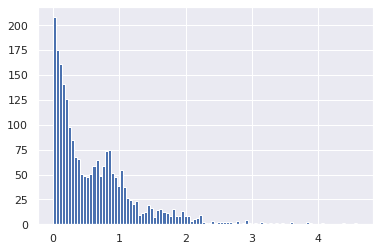

In [22]:
inter_arrivals.hist(bins=100)

In [23]:
inter_arrivals.mean()

0.6109595518696359

In [24]:
inter_arrivals.std()

0.6078056340280554

## **Exercise 2.2** Subgroup interarrival distributions.

We know that there are at least four categories of patients that use the system.  The histogram of the overall population suggests that we should explore if the distributions vary by group.

**Task:**
* For each sub group (stroke, complex, tia and other)
    * summarise the subgroup sample size
    * calculate the subgroups interarrival days (i.e. the days between consecutive stroke arrivals)
    * plot the distribution as a histogram
    * calculate the mean and standard dev
    
* Without doing a formal statistical test, what distributions do you think would be useful?

**Hints:**

* You can plot each of histograms seperately.  But if you wanted to plot histograms in a grid remember `Matplotlib` has `fig, ax = plot.subplots(nrows, ncols)` where `ax` is a numpy matrix and each element represents the corresponding axis of a chart in the grid.
* When plotting histograms you could try different numbers of bins.  A good starting number is 20.

In [25]:
# your code here ...

In [26]:
#example answer ...
iat_by_group = {}

for patient_type in range(4):
    #calculate individual iat
    data = acute_strokes.loc[acute_strokes['patient_type'] \
            == patient_type]['hosp_arrival_dt'].diff() / np.timedelta64(24, 'h')

    #print mean
    print(f'{patient_type}: n:{data.shape[0]}, m:{data.dropna().mean():.2f}, s:{data.dropna().std():.2f}')
    
    #store by group
    iat_by_group[f'{patient_type}'] = data


0: n:1259, m:1.11, s:1.09
1: n:411, m:3.41, s:3.83
2: n:157, m:8.64, s:10.70
3: n:466, m:3.00, s:4.22


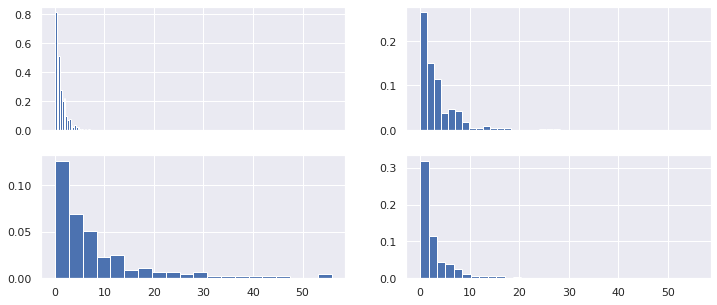

In [127]:
#plot histograms on grid sharing the same x-axis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True)

key = 0
for row in range(2):
    for col in range(2):
        #plot histogram dropping initial NAN to avoid matplotlib warning/moaning
        ax[row][col].hist(iat_by_group[f'{key}'].dropna(), bins=20, 
                          density=True)
        key += 1

In [121]:
#if you wanted to store subgroup means
means = [items.dropna().to_numpy().mean() for group, items in iat_by_group.items()]
means

[1.1126457339692635, 3.4132114235262154, 8.640179843304843, 3.0031406810035843]

In [122]:
#and subgroup std
stds = [items.dropna().to_numpy().std() for group, items in iat_by_group.items()]
stds

[1.094318783888909, 3.829969598788407, 10.664019722424488, 4.215853117064161]

## **Exercise 2.3** Interarrivals: Stroke with ESD versus Stroke with no-ESD

Let's explore if Early Supported Discharge patients have a different arrival process to non-ESD patients

**Task:**

* Using the field 'esd' split the **stroke** patients into two groups:  ESD stroke patients and non-ESD patients.
* Plot the distributions
* Calculate the mean and standard deviation of each subgroup.
* You should find that the mean and stdev are roughly the same for each group.  
    * What distribution does this suggest is a good choice and what is special about this distribution that means you don't need to model it as two seperate arrival processes?
    * What percentage of stroke arrivals go on to have ESD?  How might you model that?
* Using `auto_fit()` test if the exponential distribution is rejected

In [128]:
# your code here ...

In [129]:
inter_arrivals_esd = acute_strokes.loc[(acute_strokes['esd'] == 1) & (acute_strokes['patient_type'] == 0)]['hosp_arrival_dt'].diff() / np.timedelta64(1, 'h')
inter_arrivals_esd.shape

(281,)

In [130]:
inter_arrivals_no_esd = acute_strokes.loc[(acute_strokes['esd'] == 0) & (acute_strokes['patient_type'] == 0)]['hosp_arrival_dt'].diff() / np.timedelta64(1, 'h')
inter_arrivals_no_esd.shape

(978,)

In [131]:
#prop of arrivals that are ESD
inter_arrivals_esd.shape[0] / (inter_arrivals_esd.shape[0] + inter_arrivals_no_esd.shape[0])

0.22319301032565528

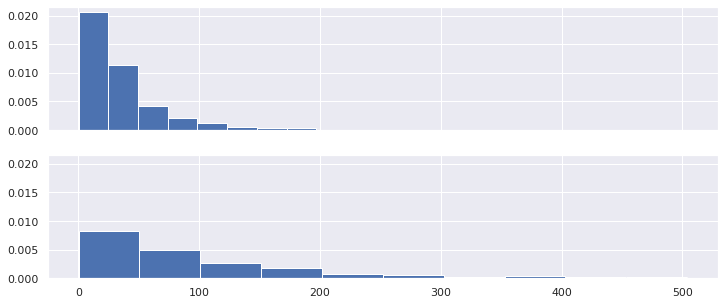

In [132]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharey=True, sharex=True)

ax[0].hist(inter_arrivals_no_esd.dropna(), density=True);
ax[1].hist(inter_arrivals_esd.dropna(), density=True);

In [133]:
inter_arrivals_esd.describe()

count    280.000000
mean      93.021131
std       94.328854
min        0.066667
25%       24.250000
50%       66.083333
75%      126.762500
max      504.033333
Name: hosp_arrival_dt, dtype: float64

In [134]:
inter_arrivals_no_esd.describe()

count    977.000000
mean      34.383828
std       35.106363
min        0.083333
25%        9.166667
50%       24.500000
75%       46.283333
max      246.166667
Name: hosp_arrival_dt, dtype: float64


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution  chi_square  p_value
0        expon   69.890803  0.12452


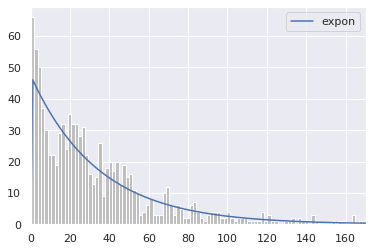


Distribution parameters:
------------------------

Distribution: expon
Parameters: (0.08333333333333333, 34.30049471170249)


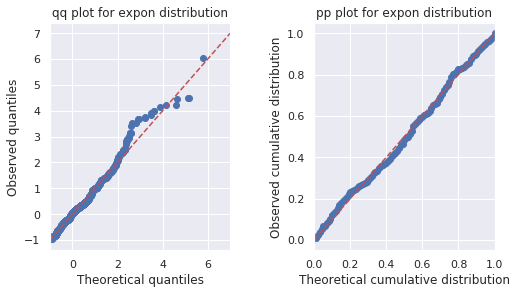

In [135]:
#doesn't reject exponential/
auto_fit(inter_arrivals_no_esd, hist=True, pp=True, dist_names=['expon'])

**possible answer**

The mean and the std of the ESD and non-ESD arrivals are for practical purposes the equal. Auto-fit suggests does not rule out an exponential distribution (i.e. a poission process).  Therefore an option would be to model both of these populations as a single arrival process where on arrival patients are labelled either 1 for ESD or for 0 ESD following a Bernoulli distribution. 

# PART 3: LENGTH OF STAY

To estimate distributions of length of stay we need to calculate the difference in days between admission and discharge.

**Before we do this there are a few complications in the dataset that we will need to manage as best we can**. The wrangled data is provided in `asu_discharges.csv`

Issues with current data:
* The data only contain a date stamp for admission to the ASU (there is no time), but we do have a hospital arrival timestamp. These can be on the same day or several (or many) days apart.
* The data include a hospital discharge datetime stamp BUT this does not always represent a discharge from ASU.
* This is because some of the patients in the data are transfered from the ASU to multiple hospital wards before they are discharged.  
    
>To handle these issues we will make some assumptions.  We'll assume that the sample of patients that only stayed on the asu is representative of the whole population and also make use of a target for getting admitting patients onto a stroke unit within 4 hours of arrival.

This is what we will do:

* We will limit our analysis of LoS to patients who only stay on a **single** ward. 
* If patients are admitted to the ASU on a different day from arrival to hospital we will assume admission time is midnight.
* If patients are admitted to the ASU on the same day as arrival to hospital we will assume patients are admitted within 4 hours of their hospital arrival unless that crosses midnight and then we will set it to 23:59.

**Note: In practice we would analyse these implications of these decisions during modelling through a process called *sensitivity analysis*.**

## **Exercise 3.1**: LoS by `patient_type`

**Task:**

* Load `asu_discharges.csv` (code provided below)
* Create a new field called `los` that is equal the patients length of stay in the asu **in days.**
* Explore the distribution of LoS by `patient_type` subgroup.

**Hints:**

* In `pandas` when you calculate the difference between two `datetime64` values you are returned a `timedelta64`.  To convert this into days you need to divide by `np.timedelta64(24, 'h')`

In [102]:
#load data
asu_discharges = pd.read_csv('../../../../input_modelling_data/asu_discharges.csv', 
                             parse_dates=['hosp_arrival_dt', 
                                          'asu_admit_dt', 
                                          'hosp_discharge_dt'])
asu_discharges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hosp_arrival_dt    2246 non-null   datetime64[ns]
 1   patient_type       2247 non-null   int64         
 2   asu_admit_dt       2247 non-null   datetime64[ns]
 3   hosp_discharge_dt  2247 non-null   datetime64[ns]
 4   esd                2247 non-null   int64         
dtypes: datetime64[ns](3), int64(2)
memory usage: 87.9 KB


In [ ]:
#your code here to calculate the difference in days

In [136]:
#example answer
asu_discharges['los'] = (asu_discharges['hosp_discharge_dt'] - \
                    asu_discharges['asu_admit_dt']) / np.timedelta64(24, 'h')

asu_discharges.head()

,hosp_arrival_dt,patient_type,asu_admit_dt,hosp_discharge_dt,esd,los
0,2010-01-01 00:00:00,0,2010-01-02 00:00:00,2010-01-13 14:25:00,0,11.600694
1,2010-01-01 12:20:00,0,2010-01-01 16:20:00,2010-01-25 15:50:00,0,23.979167
2,2010-01-02 16:10:00,0,2010-01-02 20:10:00,2010-01-08 15:00:00,0,5.784722
3,2010-01-02 21:40:00,1,2010-01-02 23:59:00,2010-01-03 19:30:00,0,0.813194
4,2010-01-03 04:30:00,3,2010-01-04 00:00:00,2010-01-22 05:00:00,0,18.208333


In [144]:
#loop through and create LoS by subgroup
los_by_group = {}

for patient_type in range(4):
    #calculate individual los
    data = asu_discharges.loc[asu_discharges['patient_type'] \
            == patient_type]['los']

    #print mean
    print(f'{patient_type}: n:{data.shape[0]}, m:{data.dropna().mean():.2f}, s:{data.dropna().std():.2f}')
    
    #store by group
    los_by_group[f'{patient_type}'] = data

0: n:1233, m:7.37, s:8.88
1: n:405, m:6.91, s:10.10
2: n:156, m:2.18, s:4.00
3: n:453, m:7.94, s:10.27


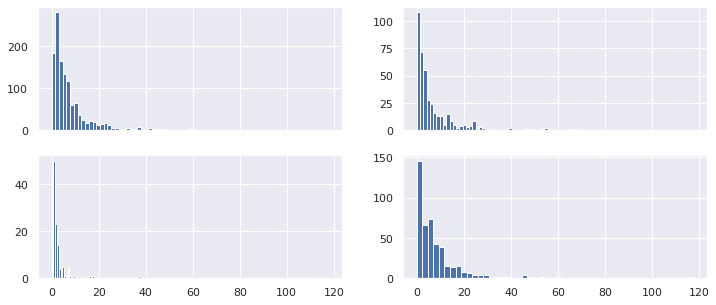

In [145]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True)

key = 0
for row in range(2):
    for col in range(2):
        #plot histogram dropping initial NAN to avoid matplotlib warning/moaning
        ax[row][col].hist(los_by_group[f'{key}'].dropna(), bins=50)
        key += 1

In [154]:
#auto fit

key = 0
for key in range(4):
    auto_fit(los_by_group[f'{key}'].dropna(), hist=False)
        


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
3      lognorm     35.948500  0.10335
0         beta    345.391470  0.00001
5     pearson3    347.223100  0.00001
1        expon    451.261461  0.00002
6  weibull_min    481.359701  0.00002
7  weibull_max   2245.012222  0.00000
4         norm   8301.037514  0.00000
2        gamma  11008.561086  0.00000

Distributions sorted by goodness of fit:
----------------------------------------
  Distribution   chi_square  p_value
3      lognorm    29.419250  0.45596
5     pearson3   135.348213  0.00407
0         beta   237.651770  0.00050
6  weibull_min   315.104293  0.00000
1        expon   345.297580  0.00000
2        gamma   929.209684  0.00000
4         norm  3826.013093  0.00000
7  weibull_max  9179.936725  0.00000

Distributions sorted by goodness of fit:
----------------------------------------
  Distribution   chi_square  p_value
3      lognorm   154.720439  0.00128
1 

**Conclusions:** There is no perfect distribution here.  But lognormal seems to be the best fitting.


## Exercise 3.2. LoS ESD versus Non-ESD

**Task**:
* Using the `esd` and `patient_type` fields split the dataset into strokes with ESD and strokes without ESD.  
* Generate summary statistics for each group.
* Use auto-fit 
* Which distributions do you think are a good choice?

In [ ]:
# your code here ...

In [155]:

#Los distributions for esd
los_stroke_esd = asu_discharges.loc[(asu_discharges['esd'] == 1) \
                                & (asu_discharges['patient_type'] == 0)]['los']

los_stroke_no_esd = asu_discharges.loc[(asu_discharges['esd'] == 0) \
                                & (asu_discharges['patient_type'] == 0)]['los']

print('ESD LoS summary')
print(los_stroke_esd.describe())
print('\n------------------\nNO ESD LOS summary')
print(los_stroke_no_esd.describe())

ESD LoS summary
count    280.000000
mean       4.801434
std        5.176494
min        0.085417
25%        1.759896
50%        3.354861
75%        5.930382
max       44.887500
Name: los, dtype: float64

------------------
NO ESD LOS summary
count    953.000000
mean       8.121903
std        9.574398
min       -0.079861
25%        2.320139
50%        4.914583
75%        9.947917
max       79.232639
Name: los, dtype: float64


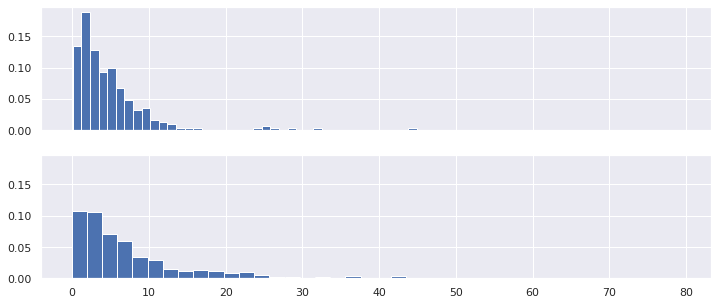

In [158]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharey=True, sharex=True)

ax[0].hist(los_stroke_esd.dropna(), density=True, bins=40);
ax[1].hist(los_stroke_no_esd.dropna(), density=True, bins=40);


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution   chi_square  p_value
2      lognorm    22.583561  0.43047
0         beta   200.898467  0.00014
4     pearson3   208.544519  0.00010
1        expon   243.715911  0.00021
5  weibull_min   276.939480  0.00048
6  weibull_max  1759.750282  0.00000
3         norm  6201.832694  0.00000


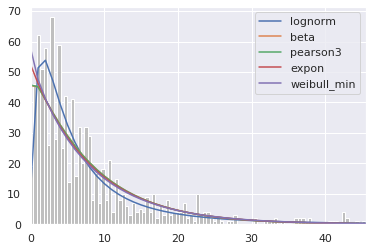


Distribution parameters:
------------------------

Distribution: lognorm
Parameters: (0.999382222318763, -0.33769558368091934, 5.229911427072647)

Distribution: beta
Parameters: (1.0461174329251233, 102667440125.70325, -0.08032007671117031, 804043315157.2334)

Distribution: pearson3
Parameters: (1.9574879938488685, 8.122658384056173, 8.028592624990448)

Distribution: expon
Parameters: (-0.0798611111111111, 8.201764165792234)

Distribution: weibull_min
Parameters: (0.975553313986685, -0.07986111111111112, 8.114808225702173)


In [159]:
dist_names = ['beta',
              'expon',
              'lognorm',
              'norm',
              'pearson3',
              'weibull_min', 
              'weibull_max']

auto_fit(los_stroke_no_esd, hist=True, pp=False, dist_names=dist_names)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution   chi_square  p_value
2      lognorm    25.563642  0.24112
4     pearson3    85.658922  0.09470
0         beta    86.478074  0.09618
5  weibull_min   154.999125  0.06828
1        expon   300.361056  0.00658
3         norm  1497.335902  0.00000
6  weibull_max  1690.794999  0.00000


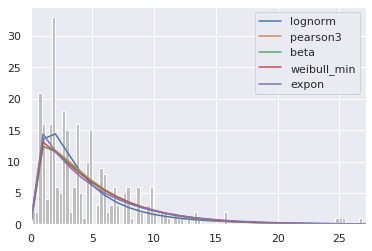


Distribution parameters:
------------------------

Distribution: lognorm
Parameters: (0.8512444493867832, -0.12661234203571153, 3.415918503472846)

Distribution: pearson3
Parameters: (1.7419909687552448, 4.801452008015927, 4.115719548751201)

Distribution: beta
Parameters: (1.270547160613324, 11597719182.75289, 0.07805763544719846, 43819687574.30808)

Distribution: weibull_min
Parameters: (1.0956014567078016, 0.08337078163782499, 4.903899445430568)

Distribution: expon
Parameters: (0.08541666666666667, 4.716016865079366)


In [160]:
auto_fit(los_stroke_esd, hist=True, pp=False, dist_names=dist_names)

### Conclusions. ESD versus no ESD los.  

No distribution is a perfect fit due to high kertosis, but lognormal is reasonable.  

## END OF LAB